In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
local_folder_path = '/kaggle/input/ecgfulldata'

csv_files = [file for file in os.listdir(local_folder_path) if file.endswith('.csv')]

dataframes = []
for file in csv_files:
    file_path = os.path.join(local_folder_path, file)
    data = pd.read_csv(file_path)
    dataframes.append(data)
    
df = pd.concat(dataframes, ignore_index=True)  
#df.shape

In [4]:
data = df.sample(frac = 0.1, random_state = 1)
#data.shape

In [5]:
peak = data[data['Label']==1]
not_peak = data[data['Label']==0]
outlier_fraction = len(peak)/float(len(not_peak))

print("Peak : {}".format(len(peak)))
print("Not Peak : {}".format(len(not_peak)))
print("Outlier fraction train : {}".format(outlier_fraction))

Peak : 4401
Not Peak : 2845577
Outlier fraction train : 0.001546610757677617


In [6]:
data.drop(['Time'], axis = 1, inplace = True)

In [7]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = X.values.reshape(-1,1)

In [8]:
test_data_path = '/kaggle/input/test-data/046_0-500000_corrected.csv'
df_test = pd.read_csv(test_data_path)

In [9]:
data_test = df_test.copy()
data_test.drop(['Time'], axis = 1, inplace = True)

In [10]:
X_test = data_test.iloc[:,:-1]
Y_test = data_test.iloc[:,-1]

In [11]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=100, algorithm='auto',
                                              leaf_size=50, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
lof.fit(X, Y)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


LocalOutlierFactor(contamination=0.001546610757677617, leaf_size=50,
                   n_neighbors=100)

In [12]:
y_pred = lof.fit_predict(X_test)

In [13]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [14]:
n_errors = (y_pred != Y_test).sum()
n_errors

1349

In [15]:
from sklearn.neighbors import LocalOutlierFactor
lof_200 = LocalOutlierFactor(n_neighbors=200, algorithm='auto',
                                              leaf_size=50, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
lof_200.fit(X, Y)

LocalOutlierFactor(contamination=0.001546610757677617, leaf_size=50,
                   n_neighbors=200)

In [16]:
y_pred_200 = lof_200.fit_predict(X_test)

In [17]:
y_pred_200[y_pred_200 == 1] = 0
y_pred_200[y_pred_200 == -1] = 1

In [18]:
n_errors_200 = (y_pred_200 != Y_test).sum()
n_errors_200

1379

In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499354
         1.0       0.00      0.00      0.00       646

    accuracy                           1.00    500000
   macro avg       0.50      0.50      0.50    500000
weighted avg       1.00      1.00      1.00    500000



In [20]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt
roc_auc = roc_auc_score(Y_test, y_pred)
mcc_score = matthews_corrcoef(Y_test, y_pred)
print("ROC-AUC score", roc_auc)
print("Matthews Correlation Coefficient:", mcc_score)

ROC-AUC score 0.49929609054898927
Matthews Correlation Coefficient: -0.001349615870678541


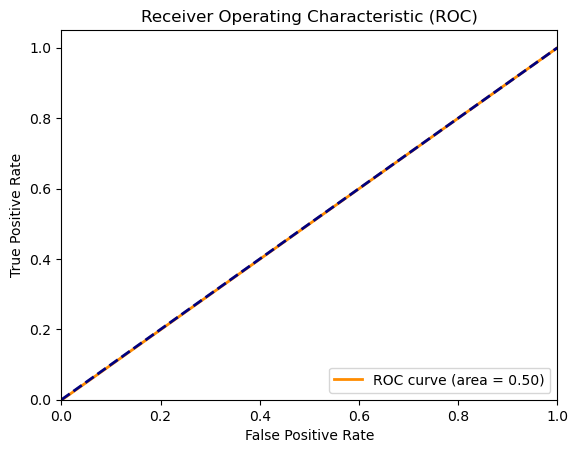

In [21]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_curve = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

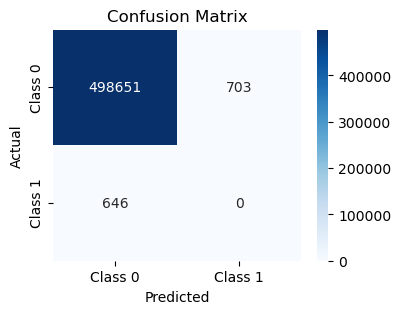

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Define class labels (modify if needed)
class_labels = ['Class 0', 'Class 1']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
df_test['Y_pred'] = y_pred

In [24]:
r_peak_times = df_test[df_test['Label'] == 1]['Time']
time_intervals = r_peak_times.diff().dropna()
average_time_interval = time_intervals.mean() 
heart_rate_bpm = 60.0 / average_time_interval

In [26]:
print("Heart rate (BPM):", heart_rate_bpm)

Heart rate (BPM): 372.6199128910745


In [27]:
r_peak_times_pred = df_test[df_test['Y_pred'] == 1]['Time']
time_intervals_pred = r_peak_times_pred.diff().dropna()
average_time_interval_pred = time_intervals_pred.mean() 
heart_rate_bpm_pred = 60.0 / average_time_interval_pred

In [28]:
print("Predicted Heart rate (BPM):", heart_rate_bpm_pred)

Predicted Heart rate (BPM): 406.414324585037
